# Machine learning preparation notebook

### Import danych i wstepny przeglad

In [1]:
import pandas as pd

df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.describe(include='all') # Opisanie wszystkich kolumn pod wzgledem podstawowych funkcji agregujacych

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [4]:
len(df.columns) # liczba kolumn, ale w sumie lepiej uzyc shape
df.shape

(32561, 15)

In [5]:
df.isnull().values.any() # Czy sa jakies wartosci null, nie ma :/

False

---

### Przeglad danych

In [6]:
df.loc[df['workclass'] == '?'].size # Duzo danych, tak jakby null, dziwnych. 

27540

In [7]:
df['workclass'].unique() # '?', dziwna wartosc

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
cols = df.select_dtypes(include=['string', 'object']).columns # Kolumny string/object
for col in cols:
    print(f"{col}: {df[f'{col}'].unique()}")
# Dziwne dane:
# workclass, occupation, native.country - '?'
# native.country - 'Outlying-US(Guam-USVI-etc)'

workclass: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation: ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex: ['Female' 'Male']
native.country: ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&T

In [9]:
cols_ = df.columns[df.isin(values=['?']).any(axis=0)].tolist() # Kolumny w ktorych wystepuje '?'

In [10]:
df.isin(values=['?']).any(axis=1).head(5) # rzedy w ktorych wystepuje '?' z podzialem na Bool

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [11]:
df[df.isin(values=['?']).any(axis=1)].size # rzedy w ktorych wystepuje '?'

35985

In [12]:
for col in cols_:
    print(f"{col}: {df[f"{col}"].unique()}\n") # Nie ma sensu zmieniac danych za pomoca fillna, bo moze to spowodowac zaklamanie danych. Dlatego najlepiej zrobic dropna

workclass: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

occupation: ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

native.country: ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']



In [13]:
print(f"Total entries: {len(df)}")
print(f"Entries that include '?': {len(df[df.isin(values=['?']).any(axis=1)])}, which is equal to {(len(df[df.isin(values=['?']).any(axis=1)]))/(len(df))*100:.2f}%")
print(f"Number of entries after deletion: {len(df) - len(df[df.isin(values=['?']).any(axis=1)])}")

Total entries: 32561
Entries that include '?': 2399, which is equal to 7.37%
Number of entries after deletion: 30162


In [14]:
df.replace(to_replace=['?'], value=None, inplace=True)

In [15]:
b_del = len(df)

In [16]:
df.dropna(inplace=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [17]:
a_del = len(df)
print(f"Before deletion: {b_del} -> after deletion: {a_del}")

Before deletion: 32561 -> after deletion: 30162


#### duplicates

In [18]:
len(df[df.duplicated()]) # Ilosc duplikatow

23

In [19]:
df[df.duplicated(keep=False)] # Wszystkie duplikaty

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6227,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
7978,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8356,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8500,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9067,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
9269,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
9305,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [20]:
df.loc[(df.index == 8645) | (df.index == 6227)] # Porownanie duplikatow

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6227,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [23]:
df.isnull().sum().sum() # Brak wartosci Nan

0

In [24]:
df.duplicated().any() # Brak duplikatow

False

---

### kodowanie zmiennych kategorycznych

Algorytmy uczenia maszynowego nie rozumieja tekstu, dlatego potrzeba zmienic dane tekstowe na dane liczbowe, aby algorytm mogl je zrozumiec

#### Kodowanie one-hot -> pd.get_dummies

In [25]:
pd.get_dummies(df['sex']) # funkcja pd.get_dummies tworzy dwie kolumny z wartosciami True/False zaleznie od wartosci w bazowej kolumnie. W tym przypadku tworzy serie

,Female,Male
1,True,False
3,True,False
4,True,False
5,True,False
6,False,True
...,...,...
32556,False,True
32557,True,False
32558,False,True
32559,True,False


In [26]:
pd.get_dummies(df, columns=['sex', 'education']) # W tym przypadku usuwa podane kolumny i dodaje na koniec kolumny True/False bazujace na wartosciach w podanych kolumnach

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,0,4356,...,False,False,False,False,False,True,False,False,False,False
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0,3900,...,False,False,False,False,False,False,False,False,False,False
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,0,3900,...,False,False,False,False,False,False,False,False,False,True
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,0,3770,...,False,False,False,False,False,True,False,False,False,False
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,0,3770,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,0,0,...,False,False,False,False,False,False,False,False,False,True
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,0,0,...,False,True,False,False,False,False,False,False,False,False
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,...,False,False,False,False,False,True,False,False,False,False
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,0,0,...,False,False,False,False,False,True,False,False,False,False


#### kodowanie etykiet liczbami -> LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder  # Biblioteka z sklearn, ktora zmienia tekst na liczby np: "Private" = 0, "Divorced" = 1 itd..

le = LabelEncoder()
df['workclass_encoded'] = le.fit_transform(df['workclass']) # funkcja robie encoding, czyli zmienia stringi na liczby
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_encoded
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,2
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,2
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,2
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,2
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,2
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,2
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2


##### Podsumowanie

Wiekszosc algorytmow uczenia maszynowego nie rozumie tekstu, dlatego wazne jest, aby tekstowe dane zamienic na dane liczbowe. Przydaje sie tutaj LabelEncoding a takze One-Hot.

One Hot -> tworzy kolumny 0/1, dla kazdej kategori (wartosci) w kolumnie, z ktorej tworzymy one hot.

Label Encoder -> zmienia dane tekstowe na dane numeryczne, przypisujac danej wartosci tekstowej dana wartosc numeryczna, troche na zasadzie slownika #hashmapy

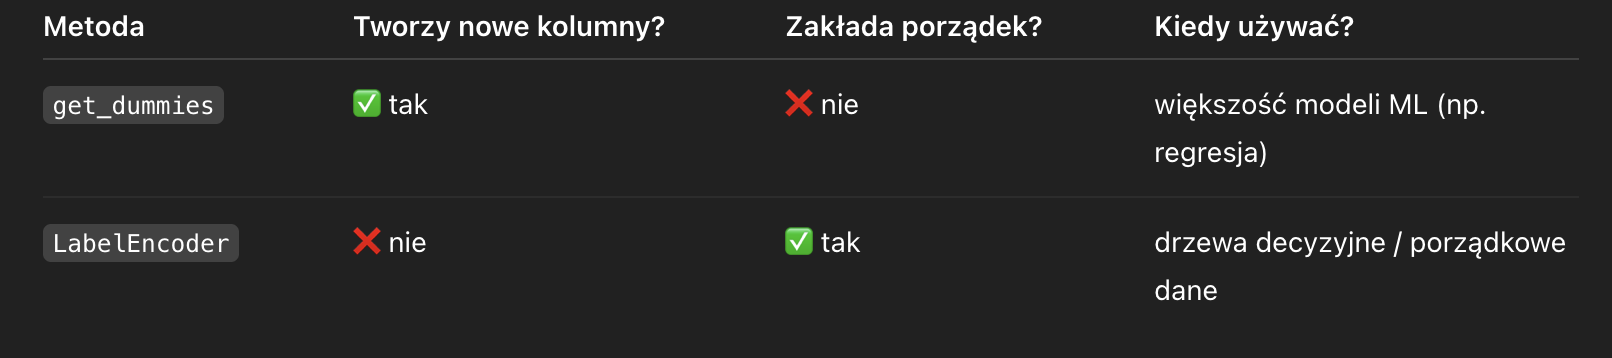

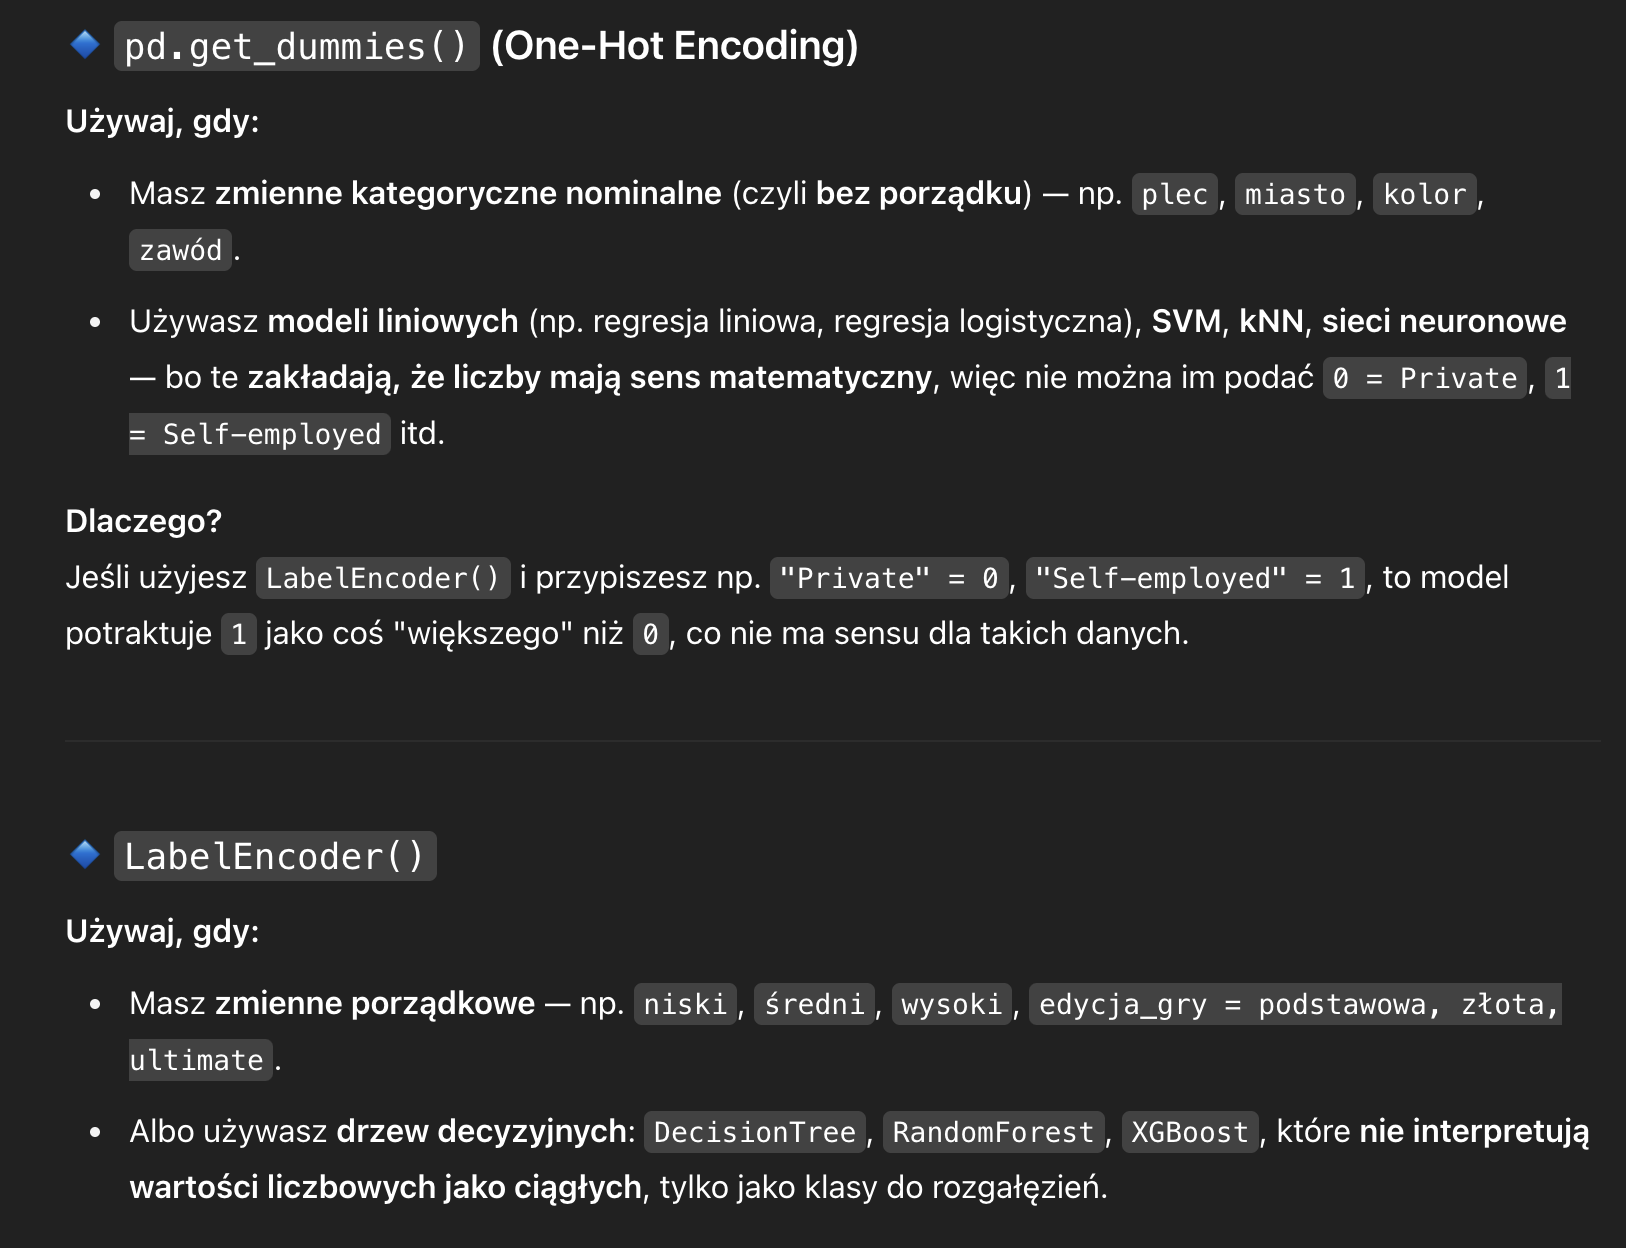

---

### Skalowanie danych numerycznych

Skalowanie danych numerycznych, to zmiana zakresu wartosci z nominalnych wartości na jakąś inną skalę, co ułatwia porownywanie danych o róznych skalach. Uzywane wlasnie czesto w Machine Learningu, do lepszego przystosowania danych, dla nauki do modelu

In [28]:
from sklearn.preprocessing import StandardScaler # Standard Scaler dziala jak z score
 
scaler = StandardScaler()
df[['age_scaled']] = scaler.fit_transform(df[['age']])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_encoded,age_scaled
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,2,3.317157
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,2,1.184832
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,2,0.194824
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,2,-0.338257
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,2,-0.033639


In [29]:
df[['age']].head().shape # Shape (5,1) -> matrix

(5, 1)

In [30]:
df['age'].head().shape # Shape (5,) -/-> matrix

(5,)

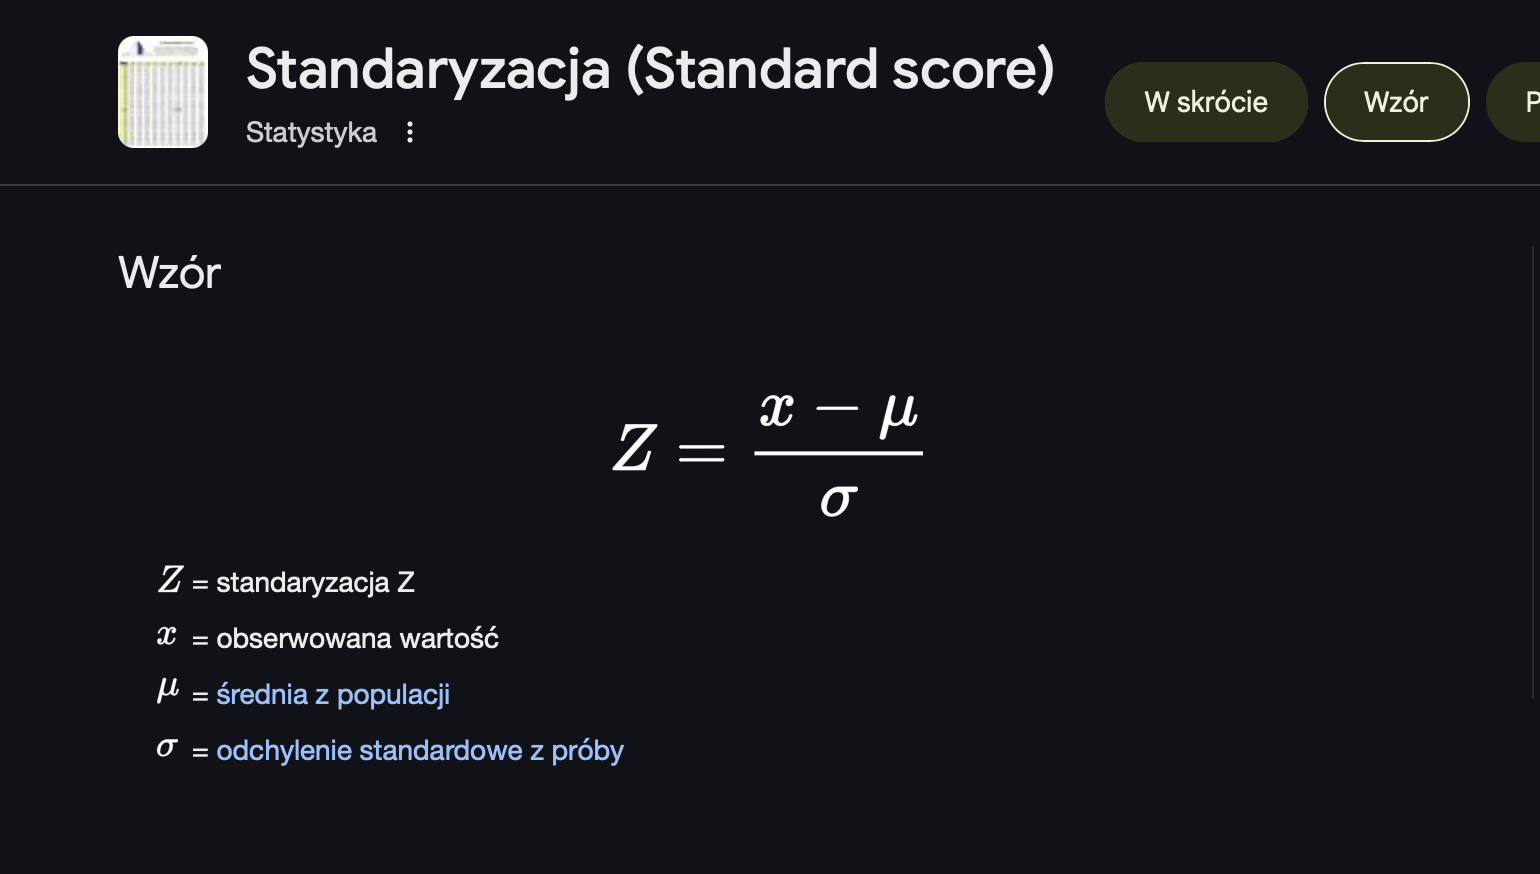

In [31]:
z = (df['age'].get(1) - df['age'].mean())/df['age'].std()
z

3.317102046999669

In [32]:
df.iloc[0, -1] # Obliczona wartosc za pomoca Standard Scaler. 

3.3171570784306055

In [33]:
from sklearn.preprocessing import MinMaxScaler # Ogranicza wartosc do zakresu jakiegos, bazowo od 0 do 1. Jest przez to bardzo czuly na outliery, dlatego trzeba przy uzywaniu ich unikac

scaler = MinMaxScaler()
df[['hours.per.week.scaled']] = scaler.fit_transform(df[['hours.per.week']])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_encoded,age_scaled,hours.per.week.scaled
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,2,3.317157,0.173469
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,2,1.184832,0.397959
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,2,0.194824,0.397959
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,2,-0.338257,0.448980
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,2,-0.033639,0.397959


In [34]:
df['education.num'].agg(['min', 'max']) # Duze wartosci i rozbieznosci

min     1
max    16
Name: education.num, dtype: int64

In [35]:
from sklearn.preprocessing import RobustScaler # Skaluje dane wokol 0, oraz jego skalowanie jest odporne w wiekszym stopniu na outliery

scaler = RobustScaler()
df[['education.num.scaled']] = scaler.fit_transform(df[['education.num']])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_encoded,age_scaled,hours.per.week.scaled,education.num.scaled
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,2,3.317157,0.173469,-0.25
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,2,1.184832,0.397959,-1.50
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,2,0.194824,0.397959,0.00
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,2,-0.338257,0.448980,-0.25
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,2,-0.033639,0.397959,-1.00


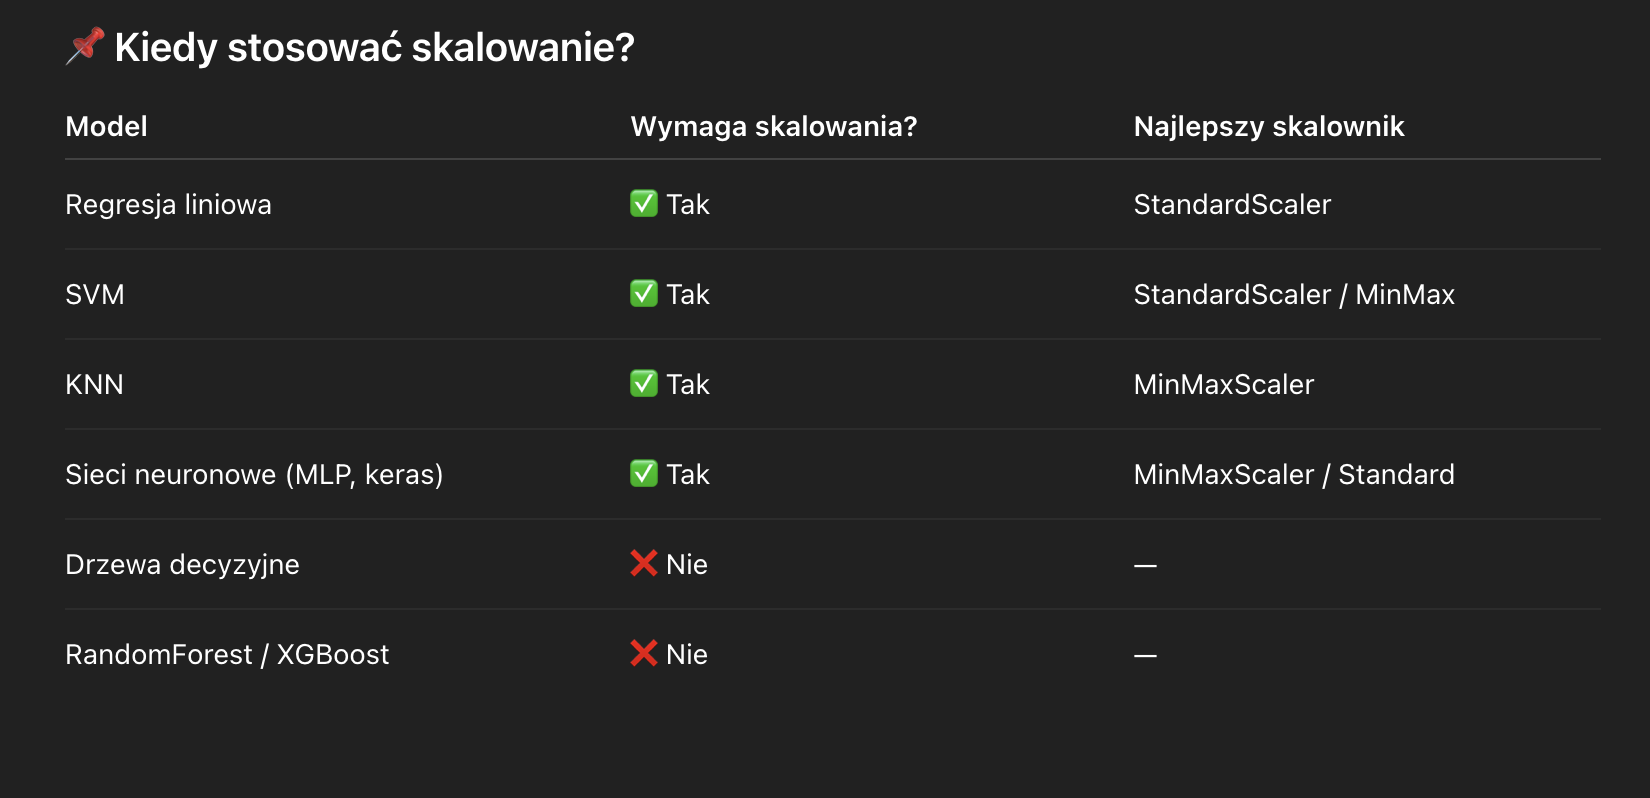

---

### Podzial na cechy i target (X, y)

Ogolny zamysl polega na tym, aby na datasetcie, na ktorym bedziemy trenowac model wyroznic cechy, czyli atrybuty z ktorych nasz model bedzie mial oszacowac wynik, ktory jest targetem w bardzo duzym uproszczeniu.

Do tego, rozdzielamy nasze dane do dwoch zmiennych X i y, gdzie X - to cechy a y - target.

In [36]:
X = df.drop('income', axis=1) # Utworzenie datasetu cech, ktore wplywaja na income, zbior skladowych do income
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,workclass_encoded,age_scaled,hours.per.week.scaled,education.num.scaled
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,2,3.317157,0.173469,-0.25
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,2,1.184832,0.397959,-1.50
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,2,0.194824,0.397959,0.00
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,2,-0.338257,0.448980,-0.25
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,2,-0.033639,0.397959,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,2,-1.252110,0.397959,0.00
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,2,-0.871338,0.377551,0.50
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,2,0.118670,0.397959,-0.25
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,2,1.489450,0.397959,-0.25


In [37]:
y = df['income'] # dataset targetow
y

1        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 30139, dtype: object

### Balansowanie zbiorów danych

W wypadku, gdy mam niezbalansowane dane - mam przewage jednej klasy (w przypadku tego datasetu - 75% danych to zarobki <=50K>) to model moze nauczyc sie tylko tej jednej klasy, dlatego aby temu zapobiec mozna zbalansowac zbior danych

In [38]:
string_cols = df.select_dtypes(include=['object']).columns
df_x = df.drop(string_cols, axis=1)
df_x.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_encoded,age_scaled,hours.per.week.scaled,education.num.scaled
1,82,132870,9,0,4356,18,2,3.317157,0.173469,-0.25
3,54,140359,4,0,3900,40,2,1.184832,0.397959,-1.50
4,41,264663,10,0,3900,40,2,0.194824,0.397959,0.00
5,34,216864,9,0,3770,45,2,-0.338257,0.448980,-0.25
6,38,150601,6,0,3770,40,2,-0.033639,0.397959,-1.00


In [39]:
y.head()

1    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
Name: income, dtype: object

In [40]:
from imblearn.over_sampling import SMOTE # Funkcja ktora tworzy sztuczne dane dla mniejszosciowej klasy

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_x, y)

X_resampled.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_encoded,age_scaled,hours.per.week.scaled,education.num.scaled
0,82,132870,9,0,4356,18,2,3.317157,0.173469,-0.25
1,54,140359,4,0,3900,40,2,1.184832,0.397959,-1.50
2,41,264663,10,0,3900,40,2,0.194824,0.397959,0.00
3,34,216864,9,0,3770,45,2,-0.338257,0.448980,-0.25
4,38,150601,6,0,3770,40,2,-0.033639,0.397959,-1.00


In [41]:
print(f"Pre oversampling: {len(df_x)} -> after oversampling: {len(X_resampled)}")

Pre oversampling: 30139 -> after oversampling: 45266


---

### Tworzenie binow *

Dodatkowa taka funkcja, to tworzenie binow za pomoca pd.cut, funkcja ta na danych liczbowych tworzy przedzialy ("Biny"), przydatna gdy chcialbym uproscic dane do wizualizacji,
utworzyc nowe cechy do modelu, lub uproscic model, aby nie brac np. Bardzo powaznie wieku pod analize

In [42]:
df['age_bins'] = pd.cut(df['age'], bins = [0,18,36,54,72,100], labels=['0-18', '18-36', '36-54', '54-72', '72-100'])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_encoded,age_scaled,hours.per.week.scaled,education.num.scaled,age_bins
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,2,3.317157,0.173469,-0.25,72-100
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,2,1.184832,0.397959,-1.50,36-54
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,2,0.194824,0.397959,0.00,36-54
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,2,-0.338257,0.448980,-0.25,18-36
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,2,-0.033639,0.397959,-1.00,36-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,2,-1.252110,0.397959,0.00,18-36
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,2,-0.871338,0.377551,0.50,18-36
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,2,0.118670,0.397959,-0.25,36-54
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2,1.489450,0.397959,-0.25,54-72
